In [1]:
import sys
sys.path.insert(0,'..')
# import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from wavhandler import *
from utils_train import train_test_val_split

data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB', labels='text')
data2 = Dataset('LG')
data2.read(data=data2.target_classes[0], setting='psd_dB', labels='text')
data3 = Dataset('LG')
data3.read(data=data3.target_classes[1], setting='psd_dB', labels='text')
data4 = Dataset('Pcfruit')
data4.read(data=data4.target_classes[1], setting='psd_dB', labels='text')

data1.clean(threshold=100,plot=False)
data2.clean(threshold=100,plot=False)
data3.clean(threshold=100,plot=False)
data4.clean(threshold=100,plot=False)

data = pd.DataFrame()
data['fnames'] = pd.concat([data1.filenames, data2.filenames, data3.filenames, data4.filenames], axis=0).reset_index(drop=True)
data['y'] = data.fnames.apply(lambda x: x.split('/')[6])
# big.dropna(how='any', axis=1, inplace=True)
data.sample(10)

Data: Chicorii.
Read 1451 filenames in 0.02 seconds.
Loaded data into matrix in 0.43 seconds.
Data: LG_drosophila_10_09.
Read 5536 filenames in 0.14 seconds.
Loaded data into matrix in 1.28 seconds.
Data: LG_zapr_26_09.
Read 7210 filenames in 0.11 seconds.
Loaded data into matrix in 1.45 seconds.
Data: D. suzukii.
Read 6423 filenames in 0.06 seconds.
Loaded data into matrix in 1.30 seconds.


,fnames,y
1002,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
1082,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
2723,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
814,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
1454,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
2042,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
4253,/home/kalfasyan/data/insects/Pcfruit/D. suzuki...,D. suzukii
5330,/home/kalfasyan/data/insects/Pcfruit/D. suzuki...,D. suzukii
244,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09
2788,/home/kalfasyan/data/insects/LG/LG_zapr_26_09/...,LG_zapr_26_09


In [88]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.reset_orig()
i= 110
# # sns.set()
# #sig = read_simple([data4.filenames.iloc[56]])[0]
# #plt.plot(sig.T)
# # data4.X.iloc[56]
# # data4.X.iloc[56,:].plot()

185


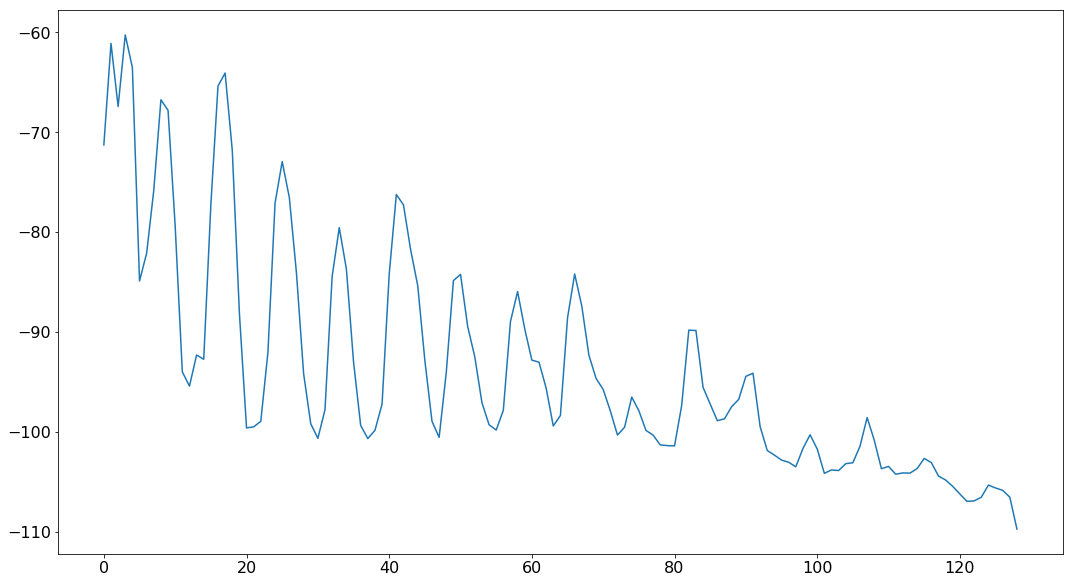

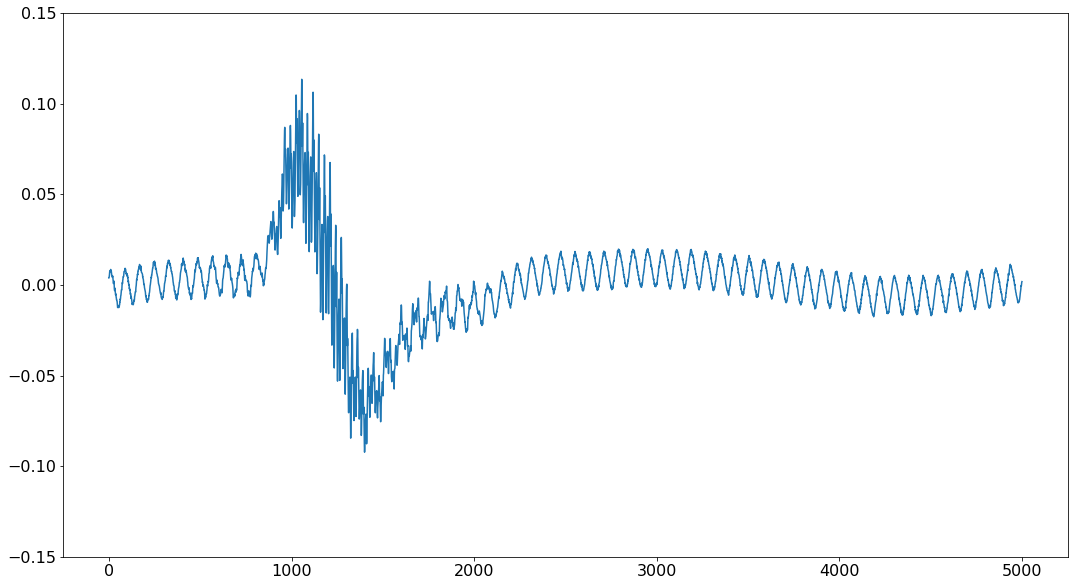

In [199]:
s = 185
print(s)

data4.X.iloc[s,:].plot(figsize=(18,10), fontsize=16)
plt.savefig('/home/kalfasyan/Desktop/b_psd.eps', format='eps')#, facecolor='w', edgecolor='w')

plt.figure(figsize=(18,10))
sig = read_simple([data4.filenames.iloc[s]])[0]
plt.plot(sig.T)
plt.ylim(-0.15,.15)

plt.savefig('/home/kalfasyan/Desktop/a_raw.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

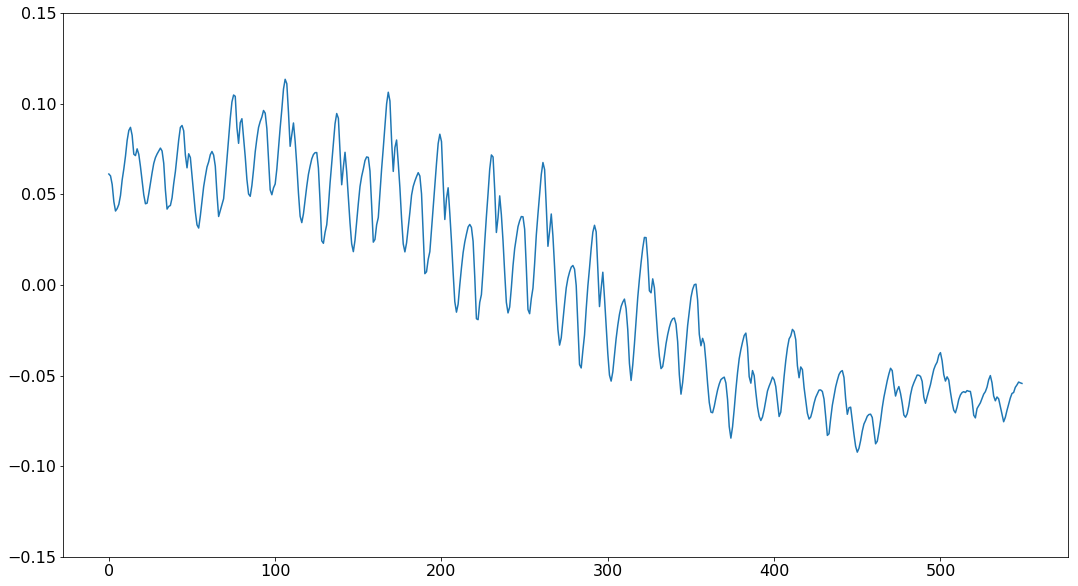

In [202]:
plt.figure(figsize=(18,10))
sig = read_simple([data4.filenames.iloc[s]])[0]
plt.plot(sig.T[950:1500])
plt.ylim(-0.15,.15)
plt.savefig('/home/kalfasyan/Desktop/a_raw_zoomed.eps', format='eps')

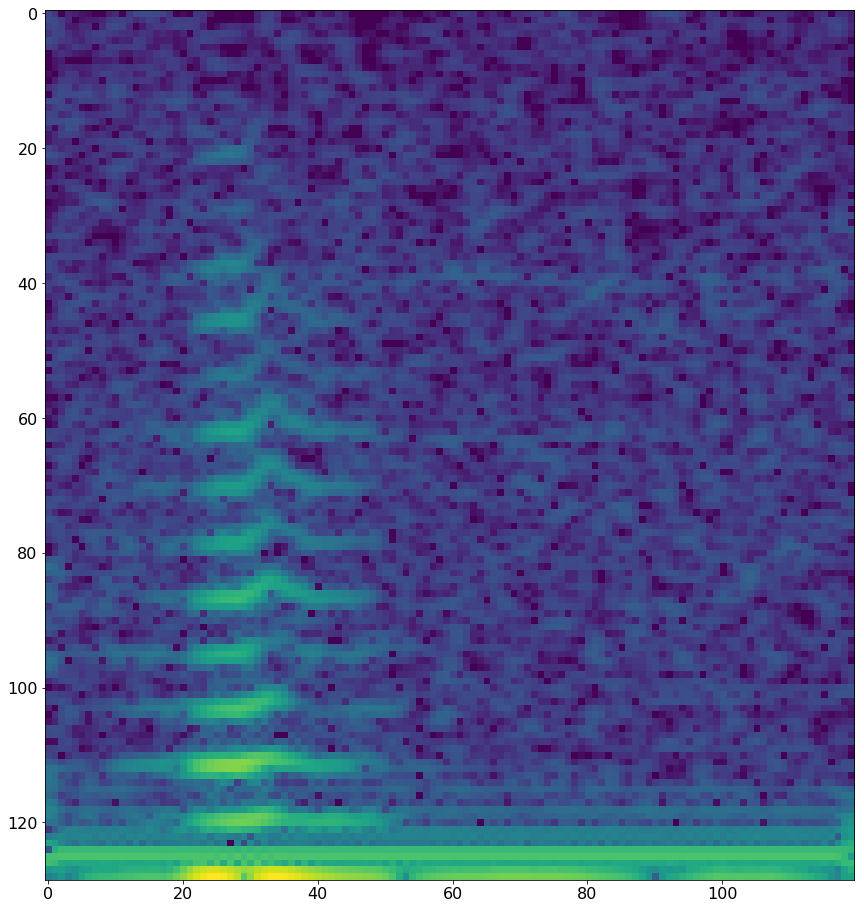

In [203]:
df = make_df_parallel(names=data4.filenames.tolist(), setting='spectrograms')
M = df.iloc[s,:].values.reshape(129,120)
plt.figure(figsize=(28,16))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.imshow(M)
plt.savefig('/home/kalfasyan/Desktop/c_spectrogram.eps', format='eps')

In [191]:
data3.y

4       LG_zapr_26_09
6       LG_zapr_26_09
7       LG_zapr_26_09
8       LG_zapr_26_09
10      LG_zapr_26_09
12      LG_zapr_26_09
16      LG_zapr_26_09
17      LG_zapr_26_09
19      LG_zapr_26_09
21      LG_zapr_26_09
24      LG_zapr_26_09
26      LG_zapr_26_09
27      LG_zapr_26_09
29      LG_zapr_26_09
31      LG_zapr_26_09
35      LG_zapr_26_09
37      LG_zapr_26_09
38      LG_zapr_26_09
39      LG_zapr_26_09
40      LG_zapr_26_09
42      LG_zapr_26_09
43      LG_zapr_26_09
47      LG_zapr_26_09
48      LG_zapr_26_09
49      LG_zapr_26_09
50      LG_zapr_26_09
51      LG_zapr_26_09
52      LG_zapr_26_09
54      LG_zapr_26_09
55      LG_zapr_26_09
            ...      
7159    LG_zapr_26_09
7161    LG_zapr_26_09
7162    LG_zapr_26_09
7163    LG_zapr_26_09
7164    LG_zapr_26_09
7166    LG_zapr_26_09
7167    LG_zapr_26_09
7169    LG_zapr_26_09
7173    LG_zapr_26_09
7175    LG_zapr_26_09
7176    LG_zapr_26_09
7177    LG_zapr_26_09
7178    LG_zapr_26_09
7182    LG_zapr_26_09
7185    LG